In [2]:
import pandas as pd

df = pd.read_csv("data/cross_validation_data_lemmatized_cv.csv")

<Axes: xlabel='no_topics', ylabel='c_v'>

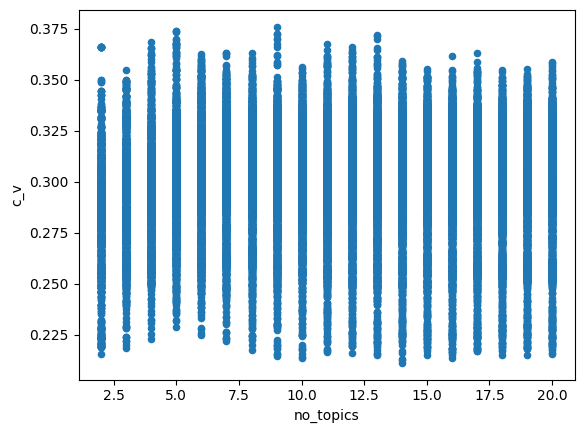

In [27]:
# plot max_df against cv score
df.plot(x="no_topics", y="c_v", kind="scatter")

In [11]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

data = pd.read_csv("data/preprocessed_stories.csv", header=None, names=["story"])

# tokenize the data for corpus and dictionary
tokens_list = [story.split() for story in data["story"]]

# create a dictionary of the data and filter out the extremes
dictionary = Dictionary(tokens_list)
dictionary.filter_extremes(no_below=0.02*data.size, no_above=0.3)

# create a corpus of the data
corpus = [dictionary.doc2bow(text) for text in tokens_list]

# get the coherence score of the topic model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=0, alpha=0.01, eta=0.01)

In [42]:
dic = dict()

for bag in corpus:
    for word in bag:
        if dictionary.get(word[0]) in dic:
            dic[dictionary.get(word[0])][0] += word[1]
            dic[dictionary.get(word[0])][1] += 1

        else:
            dic[dictionary.get(word[0])] = [word[1], 1]

dic

{'amount': [539, 361],
 'asked': [2681, 1563],
 'asking': [578, 508],
 'came': [240, 217],
 'claimed': [960, 733],
 'commission': [360, 194],
 'company': [721, 458],
 'complete': [273, 195],
 'contact': [762, 590],
 'continue': [219, 181],
 'decided': [241, 203],
 'details': [962, 683],
 'due': [264, 233],
 'even': [536, 429],
 'facebook': [243, 176],
 'friend': [422, 281],
 'help': [793, 568],
 'immediately': [574, 518],
 'information': [535, 419],
 'internet': [711, 442],
 'job': [1079, 502],
 'know': [648, 507],
 'made': [515, 418],
 'money': [2137, 1013],
 'much': [224, 193],
 'needed': [378, 317],
 'number': [2863, 1575],
 'others': [192, 177],
 'part': [302, 242],
 'personal': [435, 369],
 'police': [855, 555],
 'provided': [242, 200],
 'request': [205, 175],
 'scammer': [799, 508],
 'scammers': [308, 257],
 'sent': [593, 436],
 'time': [1065, 732],
 'use': [403, 347],
 'using': [574, 480],
 'verify': [341, 291],
 'well': [210, 186],
 'whatsapp': [1191, 841],
 'would': [1044, 658

In [43]:
# turn the dictionary into a dataframe,
# df = pd.DataFrame.from_dict(dic, orient="index", columns=["count", "num_docs"])

# turn the dictionary into a dataframe, and give every word an index
df = pd.DataFrame.from_dict(dic, orient="index", columns=["count", "num_docs"])

In [44]:
df["num_docs_percent"] = df["num_docs"] / 3495

# sort by num_docs
df = df.sort_values(by="num_docs", ascending=False)
df.head(30)

,count,num_docs,num_docs_percent
number,2863,1575,0.450644
asked,2681,1563,0.447210
received,1708,1444,0.413162
scam,1856,1316,0.376538
said,2264,1167,0.333906
told,1911,1053,0.301288
called,1385,1027,0.293848
money,2137,1013,0.289843
phone,1405,992,0.283834
account,2014,964,0.275823


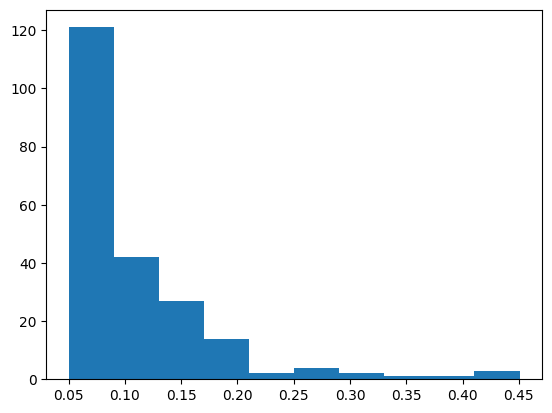

In [48]:
# plot histogram

import matplotlib.pyplot as plt

plt.hist(df["num_docs_percent"], bins=10)
plt.show()

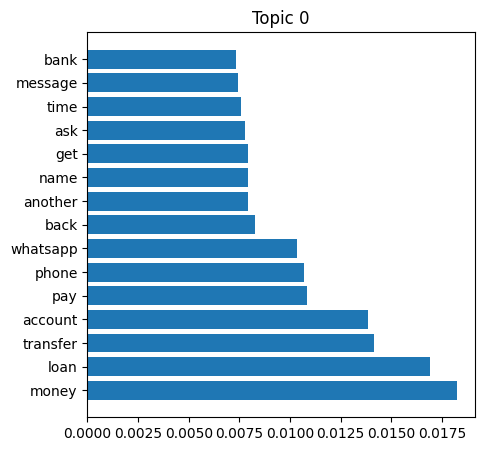

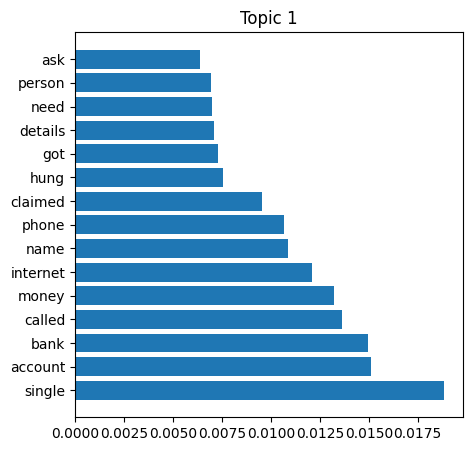

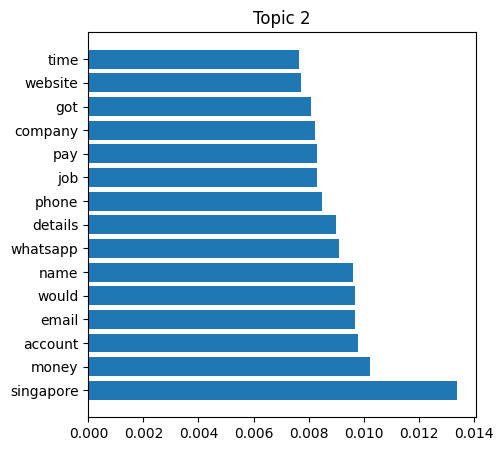

In [12]:
import matplotlib.pyplot as plt

# horizontal bar plot for the top 20 words of each topic
for i in range(3):
    plt.figure(figsize=(5, 5))
    plt.barh(y=[dictionary.get(word[0]) for word in lda.get_topic_terms(i, topn=15)],
             width=[word[1] for word in lda.get_topic_terms(i, topn=15)])
    plt.title(f"Topic {i}")
    plt.show()